<a href="https://colab.research.google.com/github/pedro-pauletti/deeplearning-pytorch/blob/main/Perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

### Creating Dataset

In [3]:
n_pts = 100
centers = [[-0.5,0.5],[0.5,-0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))

In [4]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

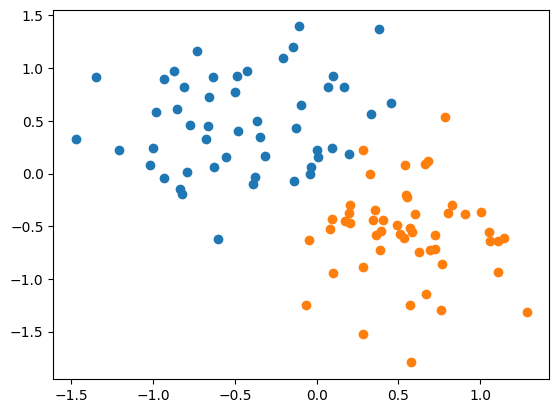

In [5]:
scatter_plot()

### Perceptron Model Setup

In [26]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [27]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [28]:
[w,b] = model.parameters()
w1, w2 = w.view(2)

def get_params():
  return(w1.item(), w2.item(), b[0].item())

In [29]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1, x2, 'r')
  scatter_plot()

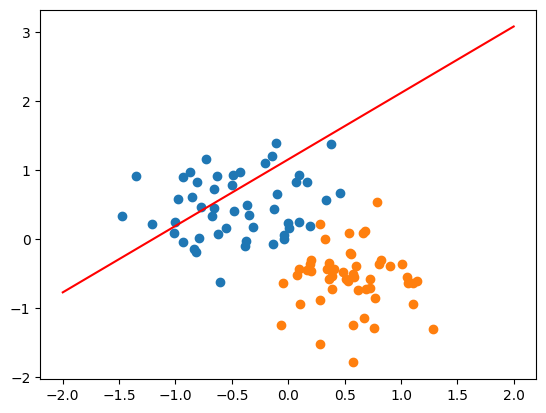

In [30]:
plot_fit('Initial Model')

### Model Training

In [31]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [32]:
epochs = 3000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print('epoch: ', i, 'loss: ', loss.item())

  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



epoch:  0 loss:  0.6185115575790405
epoch:  1 loss:  0.617464005947113
epoch:  2 loss:  0.6164200305938721
epoch:  3 loss:  0.6153795123100281
epoch:  4 loss:  0.6143423318862915
epoch:  5 loss:  0.6133086681365967
epoch:  6 loss:  0.612278401851654
epoch:  7 loss:  0.6112515330314636
epoch:  8 loss:  0.6102280020713806
epoch:  9 loss:  0.6092078685760498
epoch:  10 loss:  0.6081911325454712
epoch:  11 loss:  0.607177734375
epoch:  12 loss:  0.6061676740646362
epoch:  13 loss:  0.6051609516143799
epoch:  14 loss:  0.6041575074195862
epoch:  15 loss:  0.6031573414802551
epoch:  16 loss:  0.6021605730056763
epoch:  17 loss:  0.6011670231819153
epoch:  18 loss:  0.6001767516136169
epoch:  19 loss:  0.5991896986961365
epoch:  20 loss:  0.5982059240341187
epoch:  21 loss:  0.5972253680229187
epoch:  22 loss:  0.5962480306625366
epoch:  23 loss:  0.5952739119529724
epoch:  24 loss:  0.5943029522895813
epoch:  25 loss:  0.5933352112770081
epoch:  26 loss:  0.5923705697059631
epoch:  27 loss: 

Text(0.5, 0, 'epoch')

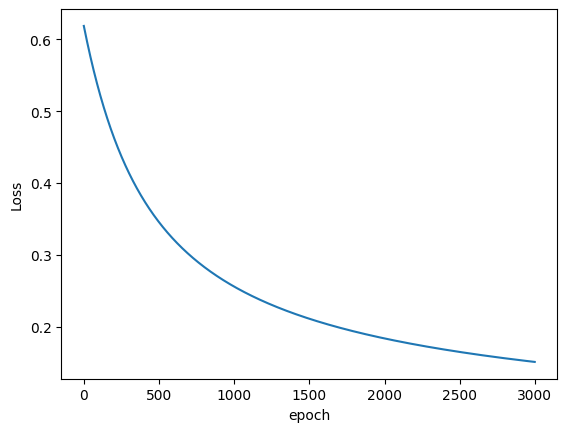

In [33]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

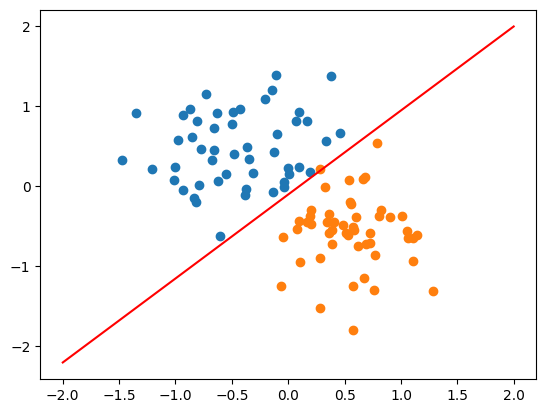

In [34]:
plot_fit('Trained Model')

### Model Testing

Green point positive probability = 0.9900645613670349
Black point positive probability = 0.006189143750816584
Green point in class = 1
Black point in class = 0


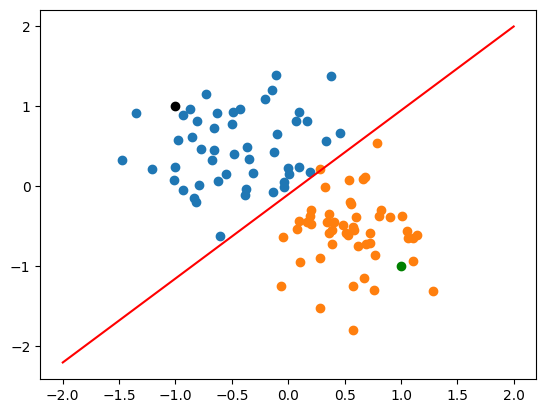

In [35]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'go')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')

print("Green point positive probability = {}".format(model.forward(point1).item()))
print("Black point positive probability = {}".format(model.forward(point2).item()))
print("Green point in class = {}".format(model.predict(point1)))
print("Black point in class = {}".format(model.predict(point2)))

plot_fit('Trained Model')